In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
Transactions = pd.read_Transactions = pd.read_excel(r"C:\Users\Dell\KPMG_VI_New_raw_data_update_final.xlsx",sheet_name="Transactions",header=1)
CustomerDemographic = pd.read_excel(r"C:\Users\Dell\KPMG_VI_New_raw_data_update_final.xlsx",sheet_name="CustomerDemographic",header=1)
CustomerAddress = pd.read_excel(r"C:\Users\Dell\KPMG_VI_New_raw_data_update_final.xlsx",sheet_name="CustomerAddress",header=1)
NewCustomerList_clean = pd.read_excel(r"C:\Users\Dell\NewCustomerList_clean.xlsx")

C:\Users\Dell\AppData\Local\Temp/ipykernel_9804/3447533310.py:2: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype={value.dtype})
  CustomerDemographic = pd.read_excel(r"C:\Users\Dell\KPMG_VI_New_raw_data_update_final.xlsx",sheet_name="CustomerDemographic",header=1)


In [3]:
#Merge first 3 datasets based on customer id
csv1_2 = pd.merge(Transactions, CustomerDemographic, on=['customer_id'])
csv1_2_3 = pd.merge(csv1_2, CustomerAddress, on=['customer_id'])


In [4]:
csv1_2_3.to_csv( "merged.csv", index=False, encoding='utf-8-sig')

In [5]:
csv1_2_3.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,wealth_segment,deceased_indicator,default,owns_car,tenure,address,postcode,state,country,property_valuation
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,...,Mass Customer,N,ã»(ï¿£âï¿£)ã»:*:,Yes,10.0,984 Hoepker Court,3064,VIC,Australia,6
1,11065,1,2950,2017-10-16,0.0,Approved,Giant Bicycles,Standard,medium,medium,...,Mass Customer,N,ã»(ï¿£âï¿£)ã»:*:,Yes,10.0,984 Hoepker Court,3064,VIC,Australia,6
2,18923,62,2950,2017-04-26,0.0,Approved,Solex,Standard,medium,medium,...,Mass Customer,N,ã»(ï¿£âï¿£)ã»:*:,Yes,10.0,984 Hoepker Court,3064,VIC,Australia,6
3,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,...,Mass Customer,N,ZÌ®ÌÍÌ ÍÍAÌ¥ÌÌÍÌ»ÌLÌ£ÍÍÌ¯Ì¹ÌÍGÌ»OÌ­ÌÌ®,Yes,10.0,4 Shopko Circle,2196,NSW,Australia,5
4,6862,4,3120,2017-10-05,0.0,Approved,Giant Bicycles,Standard,high,medium,...,Mass Customer,N,ZÌ®ÌÍÌ ÍÍAÌ¥ÌÌÍÌ»ÌLÌ£ÍÍÌ¯Ì¹ÌÍGÌ»OÌ­ÌÌ®,Yes,10.0,4 Shopko Circle,2196,NSW,Australia,5


In [6]:
df1 = csv1_2_3.sort_values(by=['customer_id'])

## Old Customer Data Exploration 

In [7]:
df1.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,wealth_segment,deceased_indicator,default,owns_car,tenure,address,postcode,state,country,property_valuation
605,14486,23,1,2017-03-27,0.0,Approved,Norco Bicycles,Mountain,low,small,...,Mass Customer,N,"""'",Yes,11.0,060 Morning Avenue,2016,New South Wales,Australia,10
608,16423,9,1,2017-12-09,1.0,Approved,OHM Cycles,Road,medium,medium,...,Mass Customer,N,"""'",Yes,11.0,060 Morning Avenue,2016,New South Wales,Australia,10
607,15663,32,1,2017-06-04,1.0,Approved,Giant Bicycles,Standard,medium,medium,...,Mass Customer,N,"""'",Yes,11.0,060 Morning Avenue,2016,New South Wales,Australia,10
606,14931,31,1,2017-12-14,1.0,Approved,Giant Bicycles,Standard,medium,medium,...,Mass Customer,N,"""'",Yes,11.0,060 Morning Avenue,2016,New South Wales,Australia,10
599,94,86,1,2017-12-23,0.0,Approved,OHM Cycles,Standard,medium,medium,...,Mass Customer,N,"""'",Yes,11.0,060 Morning Avenue,2016,New South Wales,Australia,10


In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19968 entries, 605 to 11299
Data columns (total 30 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   transaction_id                       19968 non-null  int64         
 1   product_id                           19968 non-null  int64         
 2   customer_id                          19968 non-null  int64         
 3   transaction_date                     19968 non-null  datetime64[ns]
 4   online_order                         19609 non-null  float64       
 5   order_status                         19968 non-null  object        
 6   brand                                19773 non-null  object        
 7   product_line                         19773 non-null  object        
 8   product_class                        19773 non-null  object        
 9   product_size                         19773 non-null  object        
 10  list_pri

In [9]:
df1['DOB'].fillna(method='ffill', inplace = True)

ref_date = dt.datetime.now()
df1['Age'] = df1['DOB'].apply(lambda x: len(pd.date_range(start = x, end = ref_date, freq = 'Y')))


In [10]:
df1[df1['Age']>100]
df1.drop(df1.index[df1['Age'] > 100], inplace=True)

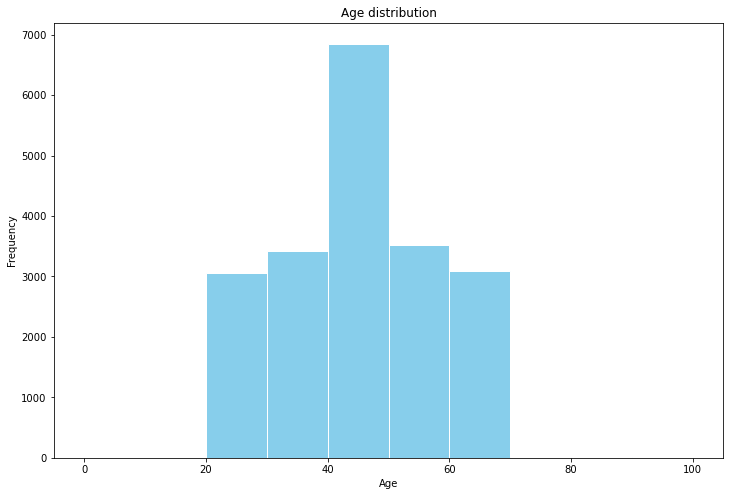

In [11]:
#Data visualisation
plt.figure(figsize = (12,8))
plt.hist(df1['Age'], color = 'skyblue', edgecolor = 'white', bins=[0,10,20,30,40,50,60,70,80,90,100])
plt.title('Age distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('age_dist_histogram.png')
plt.show()

In [12]:
df1['gender'] = df1['gender'].replace('U','Unspecified').replace('Femal','Female').replace('M','Male').replace('F','Female')

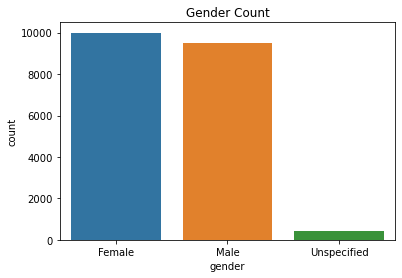

In [13]:
sns.countplot(x = 'gender', data = df1)
plt.title('Gender Count')
plt.savefig('gender_count_original.png')
plt.show()

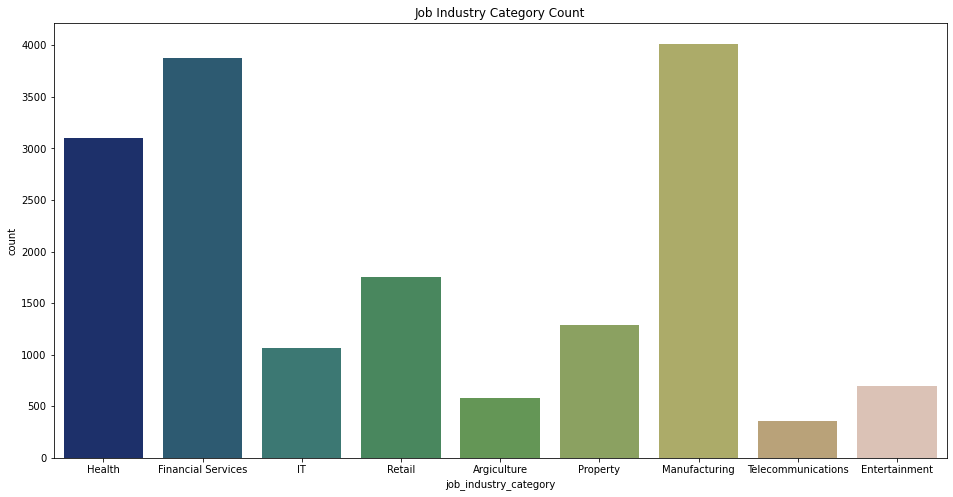

In [14]:
plt.figure(figsize = (16,8))
sns.countplot(x='job_industry_category', data = df1,palette="gist_earth")
plt.title('Job Industry Category Count')
plt.savefig('job_industry_original.png')
plt.show()

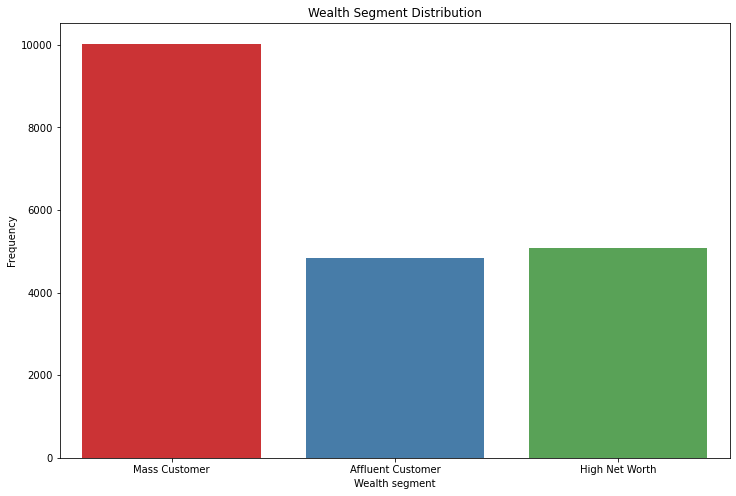

In [15]:
plt.figure(figsize = (12,8))
sns.countplot(x = 'wealth_segment', data = df1, palette="Set1")
plt.title('Wealth Segment Distribution')
plt.xlabel('Wealth segment')
plt.ylabel('Frequency')
plt.savefig('wealth_segment_original.png')
plt.show()

<Figure size 1440x720 with 0 Axes>

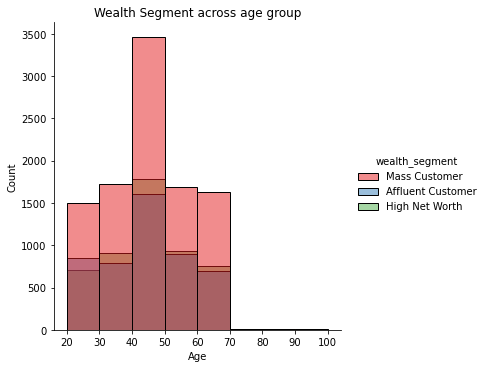

In [16]:
plt.figure(figsize = (20,10))
sns.displot(x='Age', binwidth=10, data=df1, hue='wealth_segment',palette="Set1")
plt.title('Wealth Segment across age group')
plt.savefig('wealth_segment-age_original.png')
plt.show()

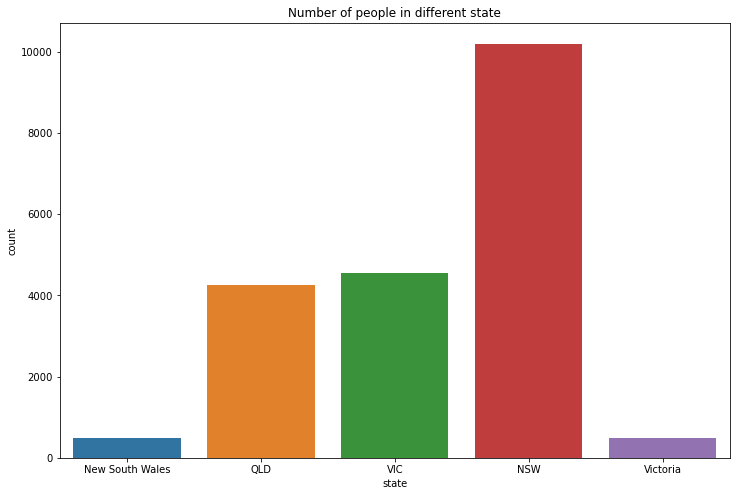

In [17]:
plt.figure(figsize = (12,8))
sns.countplot(x = 'state', data = df1)
plt.title('Number of people in different state')
plt.savefig('people-state_original.png')
plt.show()

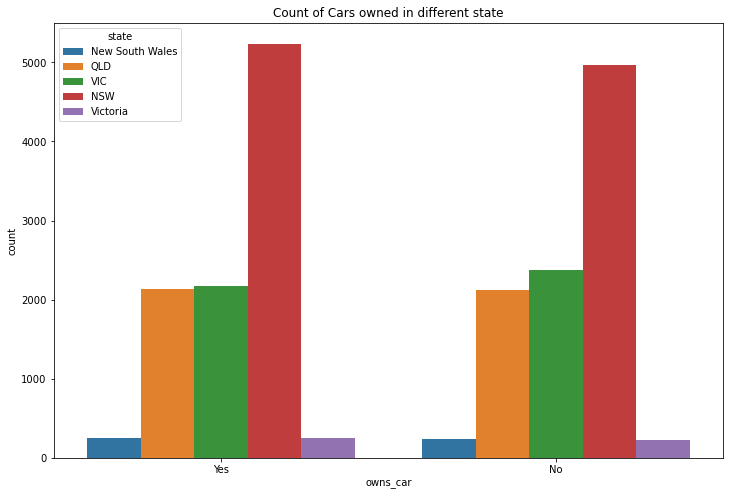

In [18]:
plt.figure(figsize = (12,8))
sns.countplot(x = 'owns_car',hue='state', data = df1)
plt.title('Count of Cars owned in different state')
plt.savefig('car-state_original.png')
plt.show()

In [19]:
sum = df1.groupby('state', as_index=False).past_3_years_bike_related_purchases.sum()
sum

,state,past_3_years_bike_related_purchases
0,NSW,500443
1,New South Wales,24761
2,QLD,207749
3,VIC,217683
4,Victoria,22421


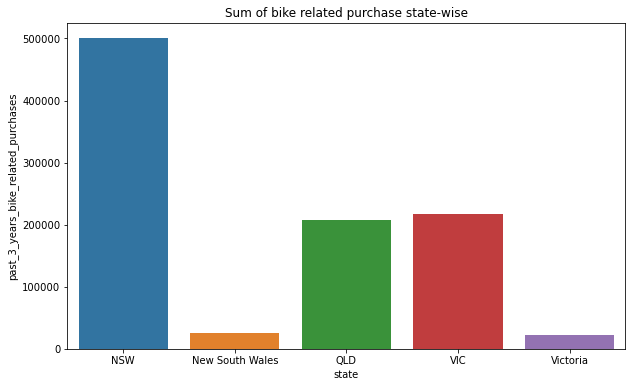

In [20]:
plt.figure(figsize=(10,6))
plt.title("Sum of bike related purchase state-wise")
sns.barplot(x=sum['state'], y=sum['past_3_years_bike_related_purchases'])
plt.savefig('past_3_yrs-state_original.png')
plt.show()

## New Customer List Exploration

In [21]:
df2=NewCustomerList_clean
df2.head()

,Unnamed: 0,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value
0,0,4001,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,14,45 Shopko Center,4500,QLD,Australia,6,1,1.718750
1,1,4002,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,16,14 Mccormick Park,2113,NSW,Australia,11,1,1.718750
2,2,4003,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,10,5 Colorado Crossing,3505,VIC,Australia,5,1,1.718750
3,3,4004,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,5,207 Annamark Plaza,4814,QLD,Australia,1,4,1.703125
4,4,4005,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,19,115 Montana Place,2093,NSW,Australia,9,4,1.703125


In [22]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   Unnamed: 0                           1000 non-null   int64         
 1   customer_id                          1000 non-null   int64         
 2   first_name                           1000 non-null   object        
 3   last_name                            971 non-null    object        
 4   gender                               1000 non-null   object        
 5   past_3_years_bike_related_purchases  1000 non-null   int64         
 6   DOB                                  983 non-null    datetime64[ns]
 7   job_title                            894 non-null    object        
 8   job_industry_category                835 non-null    object        
 9   wealth_segment                       1000 non-null   object        
 10  deceased_indi

In [23]:
df2['DOB'].fillna(method='ffill', inplace = True)

In [24]:
ref_date2 = dt.datetime.now()
df2['Age'] = df2['DOB'].apply(lambda x: len(pd.date_range(start = x, end = ref_date2, freq = 'Y')) if str(x) else None)

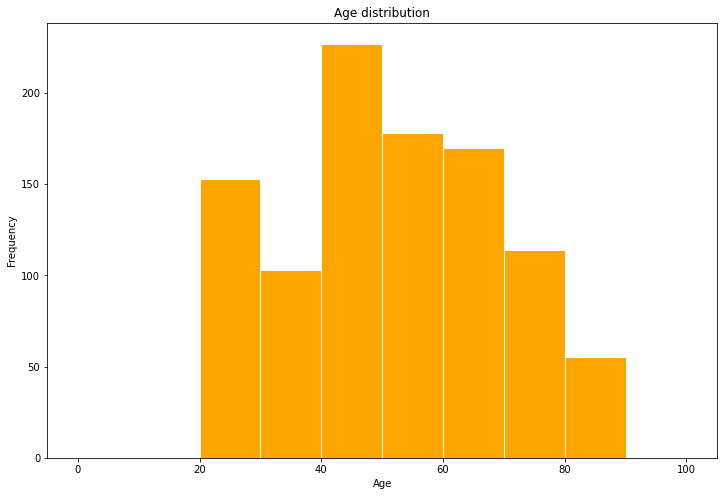

In [25]:
plt.figure(figsize = (12,8))
plt.hist(df2['Age'], color = 'ORANGE', edgecolor = 'white', bins=[0,10,20,30,40,50,60,70,80,90,100])
plt.title('Age distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('age_dist_histogram2.png')
plt.show()

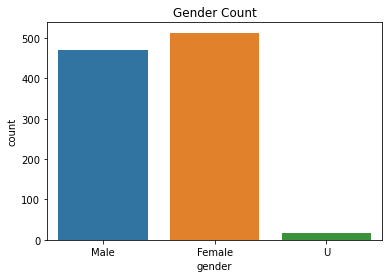

In [26]:
sns.countplot(x = 'gender', data = df2)
plt.title('Gender Count')
plt.savefig('gender_count_original2.png')
plt.show()

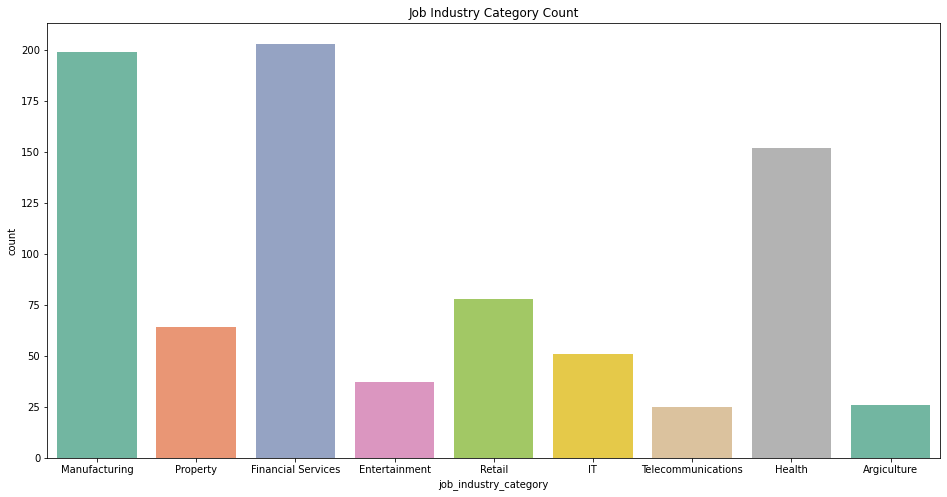

In [27]:
plt.figure(figsize = (16,8))
sns.countplot(x='job_industry_category', data = df2,palette="Set2")
plt.title('Job Industry Category Count')
plt.savefig('job_industry_original2.png')
plt.show()

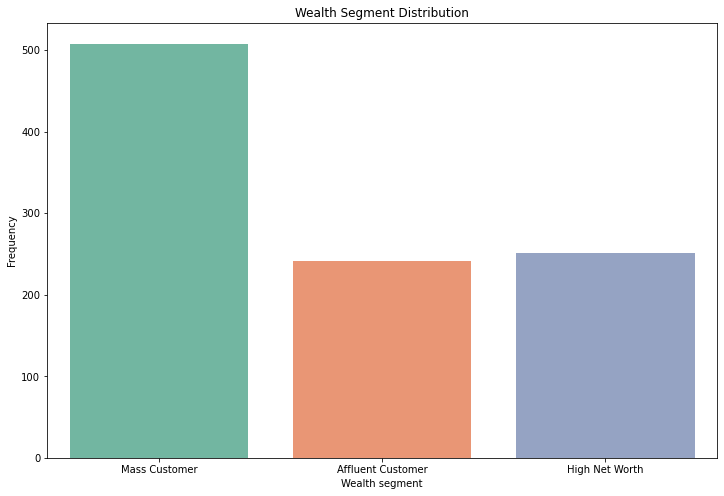

In [28]:
plt.figure(figsize = (12,8))
sns.countplot(x = 'wealth_segment', data = df2, palette="Set2")
plt.title('Wealth Segment Distribution')
plt.xlabel('Wealth segment')
plt.ylabel('Frequency')
plt.savefig('wealth_segment_original2.png')
plt.show()

<Figure size 1152x576 with 0 Axes>

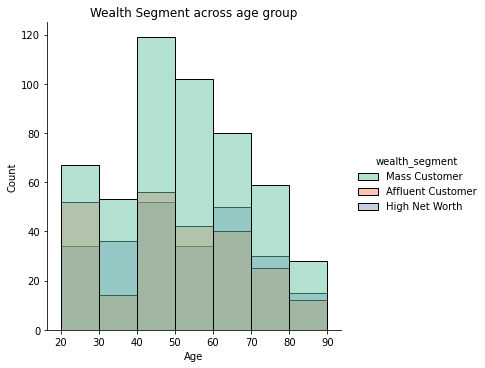

In [29]:
plt.figure(figsize = (16,8))
sns.displot(x='Age', binwidth=10, data=df2, hue='wealth_segment',palette="Set2")
plt.title('Wealth Segment across age group')
plt.savefig('wealth_segment-age_original2.png')
plt.show()

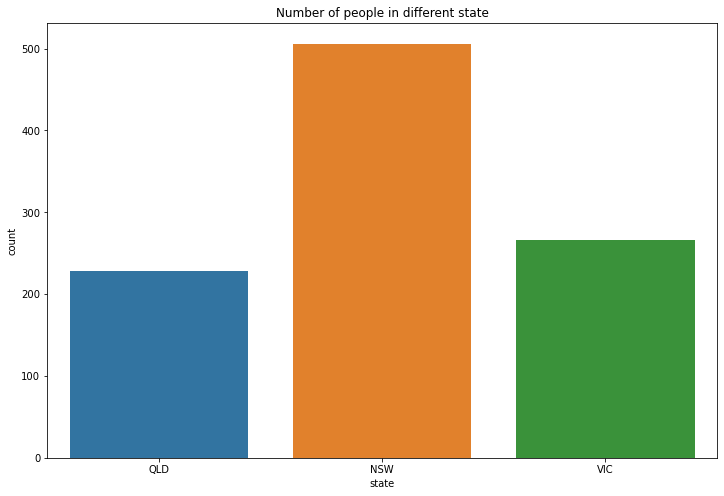

In [30]:
plt.figure(figsize = (12,8))
sns.countplot(x = 'state', data = df2)
plt.title('Number of people in different state')
plt.savefig('people-state_original2.png')
plt.show()

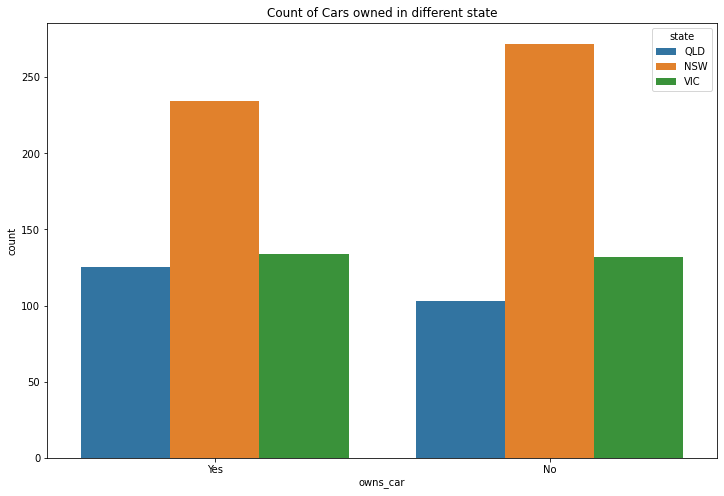

In [31]:
plt.figure(figsize = (12,8))
sns.countplot(x = 'owns_car',hue='state', data = df2)
plt.title('Count of Cars owned in different state')
plt.savefig('car-state_original2.png')
plt.show()

In [32]:
sum2 = df2.groupby('state', as_index=False).past_3_years_bike_related_purchases.sum()
sum2

,state,past_3_years_bike_related_purchases
0,NSW,25409
1,QLD,11751
2,VIC,12676


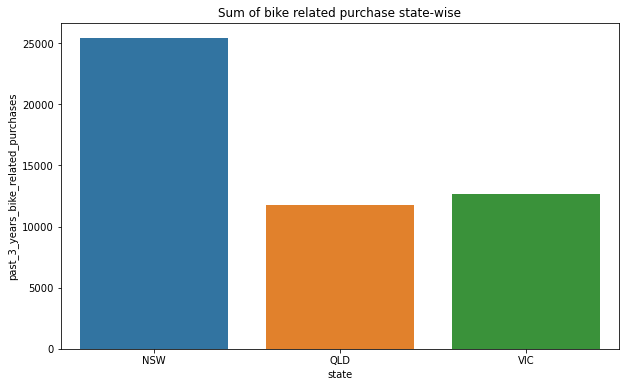

In [33]:
plt.figure(figsize=(10,6))
plt.title("Sum of bike related purchase state-wise")
sns.barplot(x=sum2['state'], y=sum2['past_3_years_bike_related_purchases'])
plt.savefig('past_3_yrs-state_original2.png')
plt.show()